## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

   ans: analytical approach is the use of an appropriate process to break a problem down into the smaller pieces necessary slove         it.Each piece becomes a smaller and easier problem to solve. I choose this project because red wine quality is best             quality .there are many social drinking on this dataset. the project use multivariable Linear regression approach for           the dataset

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

Ans: white wine quality data is require for predicting the red wine quality and the dataset is adding a name , acidity,pH level,sugar and other chemical properties for determing the features are the best quality the red dataset.the dataset is not using taste , ingredients and colour.

### Data Collection

**Q3. From where do we get our data?**

Ans: I get this dataset in kaggle.com

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

Ans: Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
     A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal
     @2009

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

Ans: Understanding the impact of each variable on the final output label is vary crucial for businesses or specially wine producers. 


 <li>Check the shape of data, and the datatypes of the features</li>
 <li>Understand the data by carrying out any steps that you think are necessary</li>

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression 

In [64]:
data_red = pd.read_csv("winequality-red.csv")
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [65]:
data_red.shape

(1599, 12)

In [66]:
data_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Data Preparation

#### Explore the dataset further

<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

In [67]:
data_red.info()
data_red.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

we do not have any missing value in the dataset

In [68]:
data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [69]:
data_red2 = data_red.drop("quality", axis = 1)
label = data_red["quality"]


check for outlier if any handle them

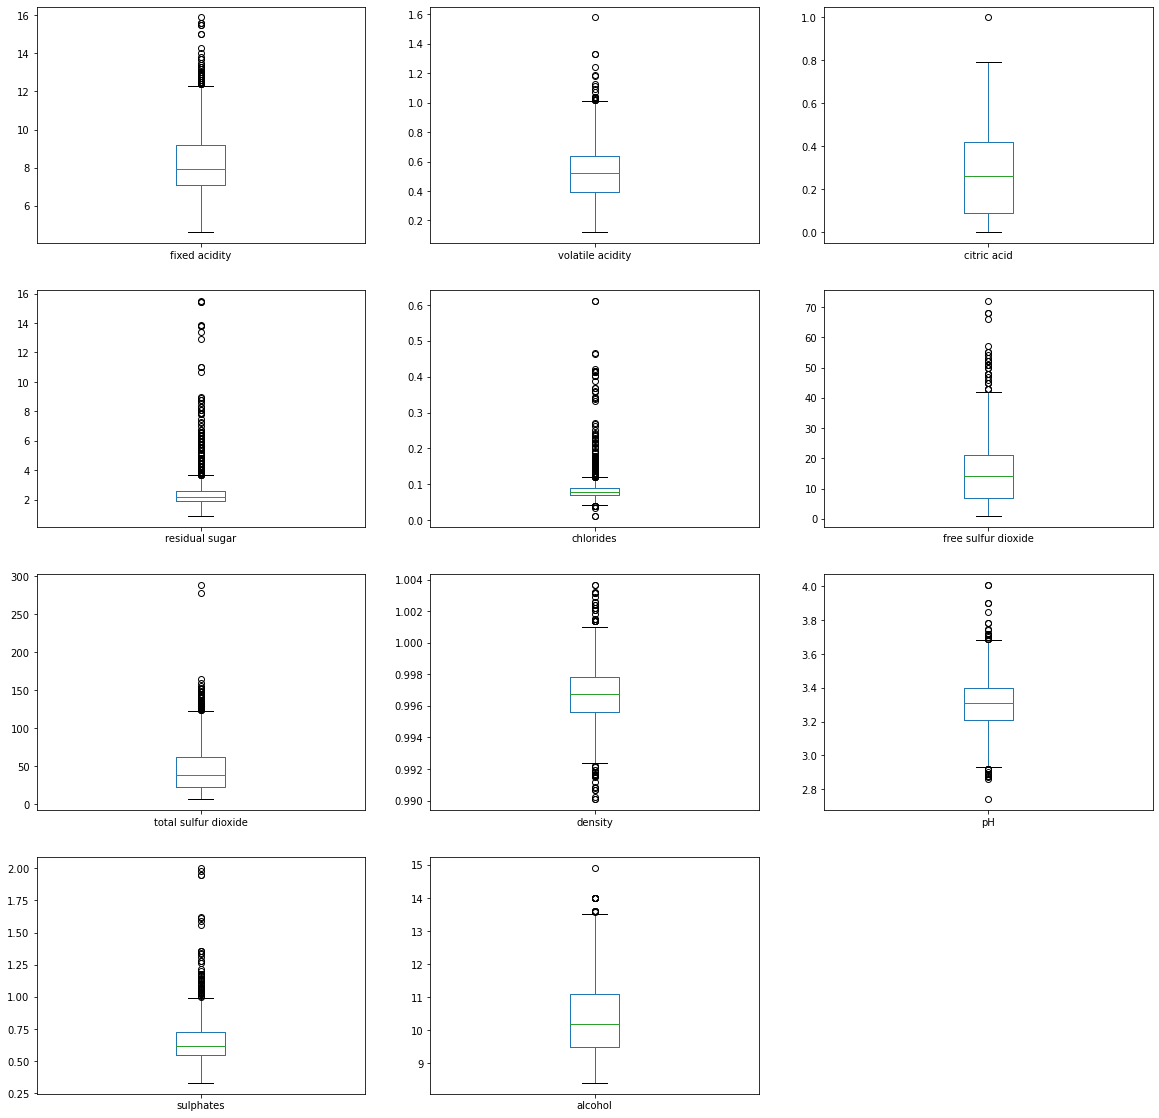

In [70]:
plt.figure(figsize=(20,20))

for i, col in enumerate(list(data_red2.columns.values)):
    plt.subplot(4,3,i+1)
    data_red.boxplot(col)
    plt.grid()

In [71]:
outlier_indices = []
def outlier_detection(name):
    index_outlier = []
    Q1 = np.percentile(data_red2[name], 25)
    Q3 = np.percentile(data_red2[name], 75)
    IQR = Q3 - Q1
    lower_point = Q1 - 1.5 * IQR
    higher_point = Q3 + 1.5 * IQR
    
    for i, point in enumerate(data_red2[name]):
        if point < lower_point or point > higher_point:
            index_outlier.append(i)

    return index_outlier

for name in list(data_red2):
    outlier_indices += outlier_detection(name)
    
# number of outliers
print(len(outlier_indices))   

573


In [72]:
data_red_outlier_removal = data_red2.drop(index = outlier_indices)


In [73]:
print(len(data_red_outlier_removal))


1194


In [75]:
label = label.drop(index = outlier_indices)

In [76]:
len(label)

1194

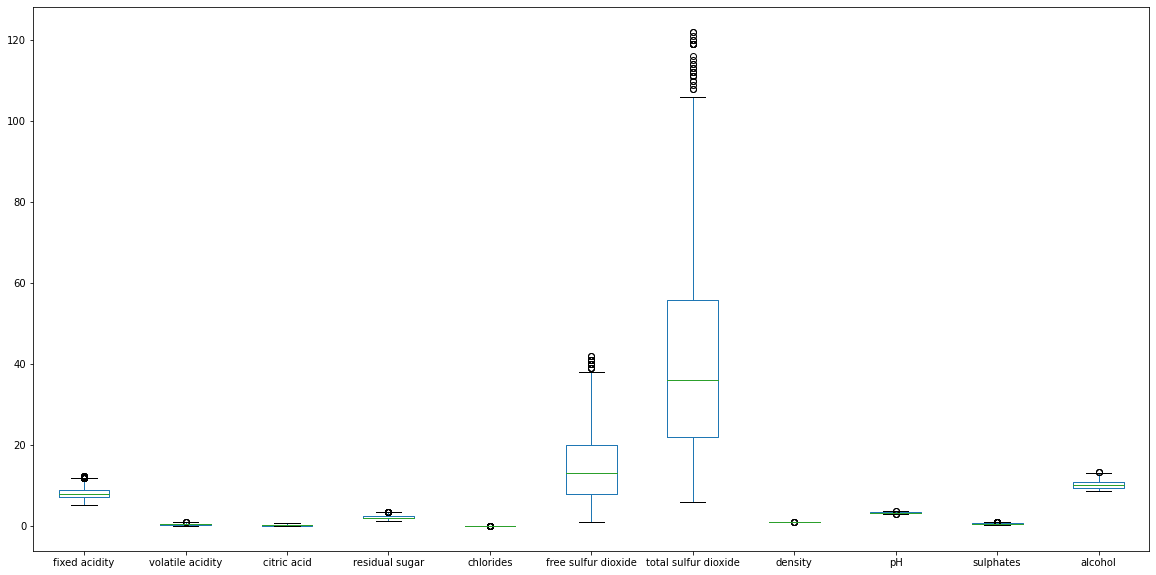

In [77]:
fig = plt.figure(figsize = (20,10))
boxplot = data_red_outlier_removal.boxplot(column=[i for i in list(data_red_outlier_removal)], grid = False)

<li>As we can see we have removed outliers from our data at the cost of removing some rows. Our data now contains 1194 rows and 12 columns.</li>

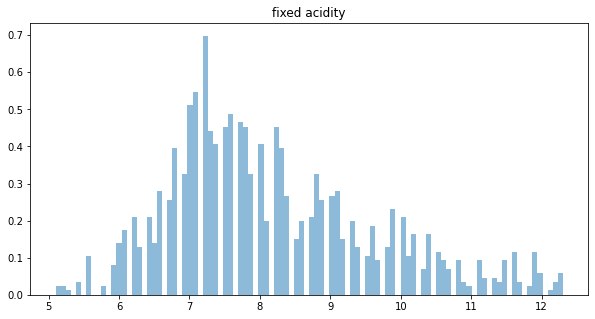

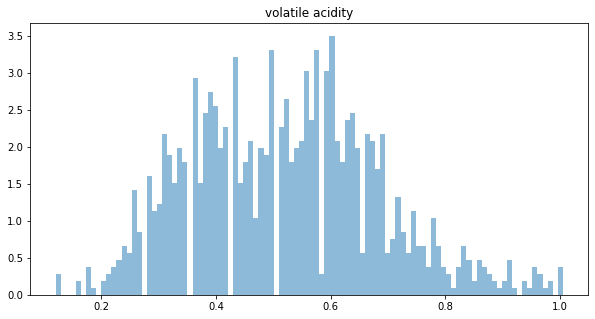

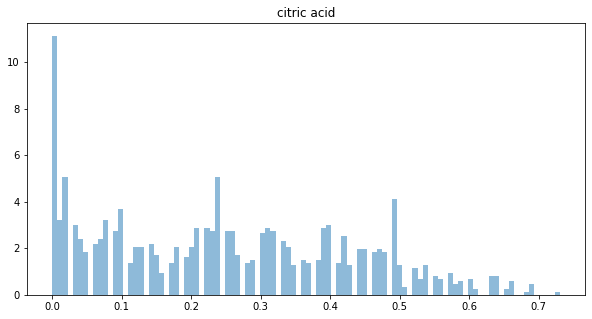

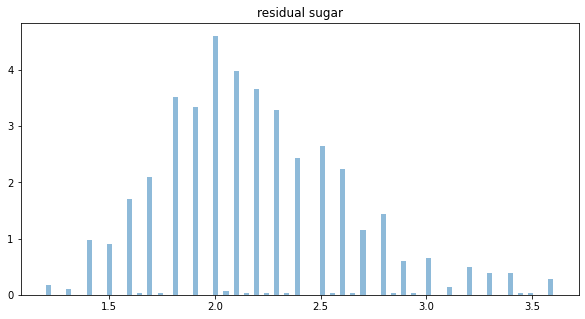

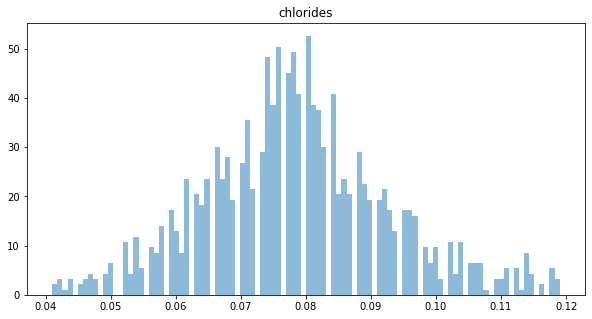

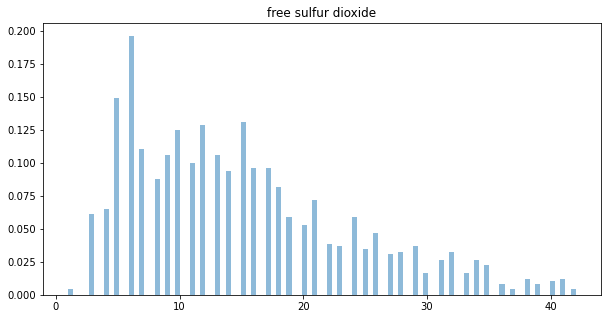

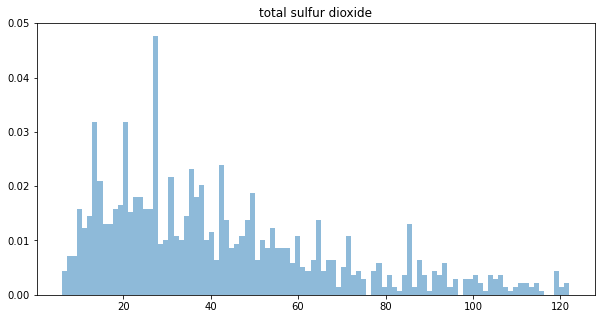

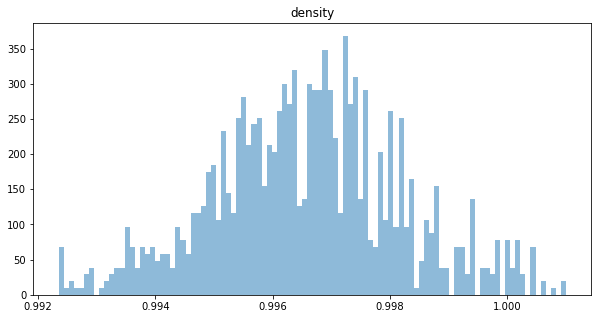

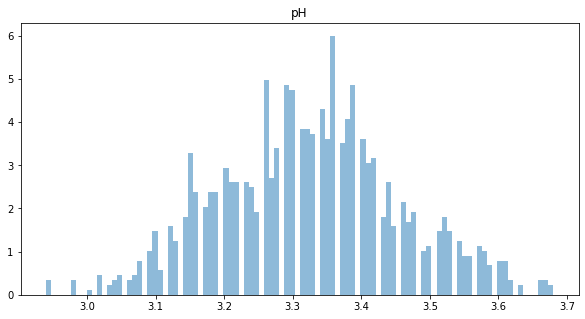

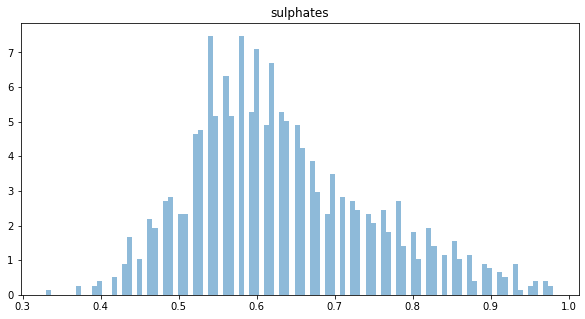

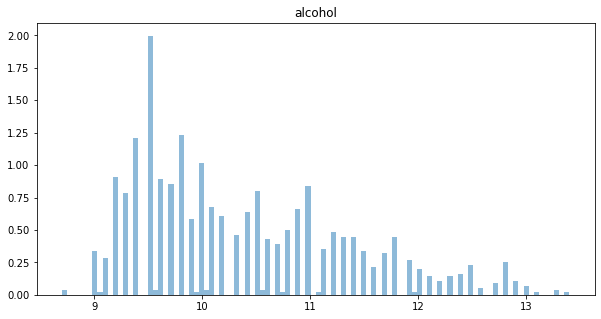

In [78]:
for i in data_red_outlier_removal:
    plt.figure(figsize=(10, 5))
    plt.title(i)
    plt.hist(data_red_outlier_removal[i], alpha=0.5, bins=100, density=True, stacked=True)
    plt.show()

<li>check the distribution of data distribution in histograms</li>

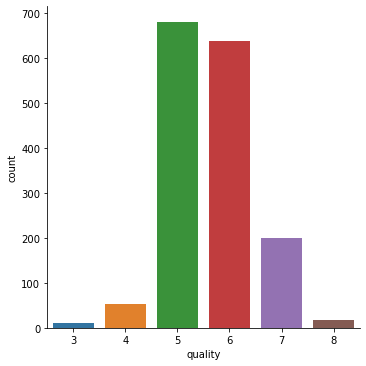

In [79]:
sns.catplot(x='quality',data=data_red,kind='count')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

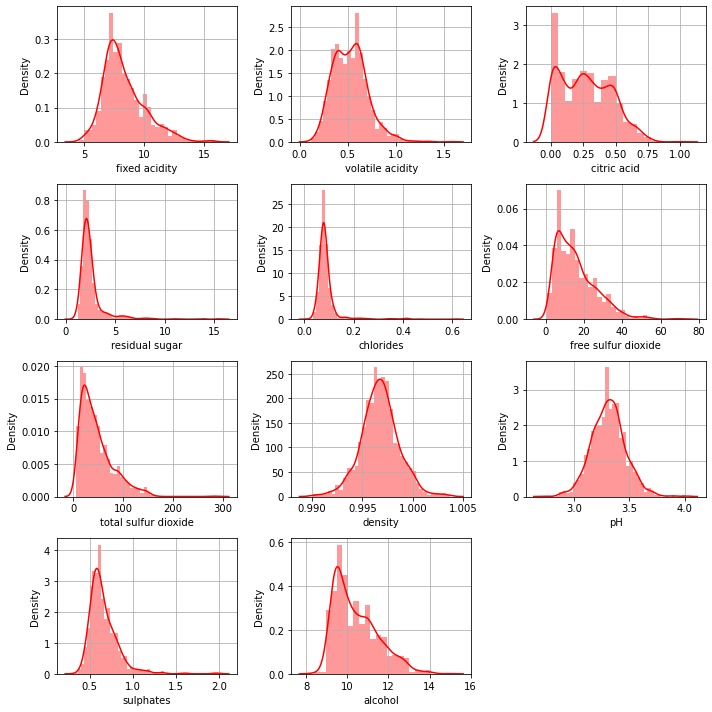

In [80]:
plt.figure(figsize=(10,10))

for i, col in enumerate(list(data_red2.columns.values)):
    plt.subplot(4,3,i+1)
    sns.distplot(data_red2[col],color='r',kde=True,label='data')
    plt.grid()
    plt.tight_layout()
    

implement correlation  heatmap

<AxesSubplot:>

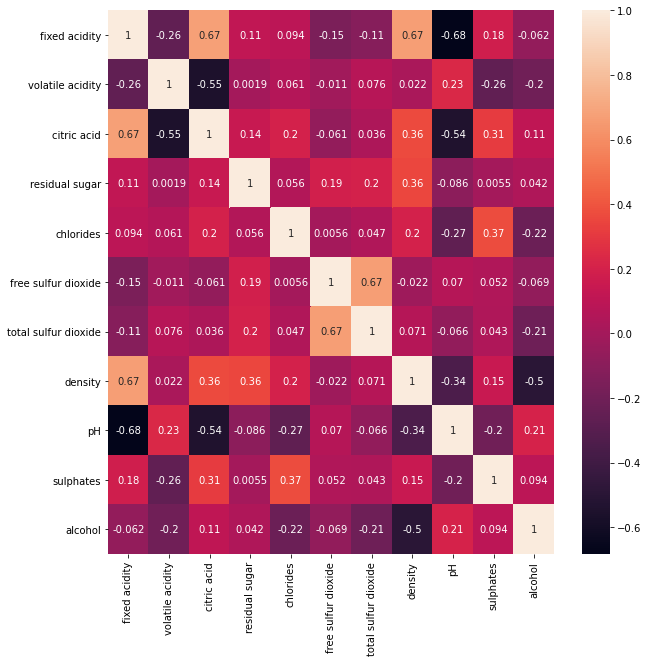

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(data_red2.corr(),color = "k", annot=True)

In [82]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(data_red_outlier_removal, label, test_size = 0.3)

### Modeling


<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>

### Linear Regression

In [84]:
from sklearn.linear_model import  LinearRegression
lr= LinearRegression()
lr2 = lr.fit(X_train, y_train)

scores = cross_val_score(lr2, X_train, y_train, cv = 5)

In [85]:
y_pred_Linear = cross_val_predict(lr2, X_test, y_test, cv = 5) 

In [86]:
len(y_pred_Linear)

359

In [87]:
len(X_test)

359

### Logistic Regression

In [92]:

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5976047904191617

In [93]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [94]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data

BEST PARAMS: {'C': 100}

0.544 (+/-0.048) for {'C': 0.001}
0.541 (+/-0.058) for {'C': 0.01}
0.588 (+/-0.052) for {'C': 0.1}
0.594 (+/-0.072) for {'C': 1}
0.601 (+/-0.068) for {'C': 10}
0.605 (+/-0.085) for {'C': 100}
0.592 (+/-0.065) for {'C': 1000}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [95]:
y_pred_Logistic=clf.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score
acurracy = round(accuracy_score(y_test, y_pred_Logistic), 3)
print(accuracy)

0.596


### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "formulae.png">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/


<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

# MAE

In [100]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred_Linear)

0.48570459905828767

In [101]:
mean_absolute_error(y_test,y_pred_Logistic)

0.4373259052924791

# R-squared

In [41]:
from sklearn.metrics import r2_score
# R2 for linear on  data
r2_score(y_test, y_pred_Linear)

0.394775570654741

In [42]:
# R2 for logistic on data
r2_score(y_test, y_pred_Logistic)

0.2536648530494904

# Root mean Squared error


In [102]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_Linear)

0.3795813098578799

In [103]:
mean_squared_error(y_test, y_pred_Logistic)

0.47075208913649025

<li>Compare these 3 metrics for the two models and analyze the performance</li>

In [104]:

importance = lr2.coef_

# summarize feature importance
for i,v in enumerate(importance):
    print('data_red: %0d, Score: %.5f' % (i,v))

data_red: 0, Score: 0.04276
data_red: 1, Score: -0.74997
data_red: 2, Score: -0.26788
data_red: 3, Score: 0.02577
data_red: 4, Score: -1.27087
data_red: 5, Score: 0.00401
data_red: 6, Score: -0.00259
data_red: 7, Score: -36.65368
data_red: 8, Score: -0.53446
data_red: 9, Score: 1.66237
data_red: 10, Score: 0.30442


logistic regression's value is 0.6 , it is not define analyze the performances or it is define faction value.

### Conclusion



By using above model after tuning we are getting 60% acurracy, that is, if any data of some other wine is being provided to us we will be able to predict where it is Good or Bad by 60% Accuracy, which is a pretty good number.